In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from posts import most_common_time, plot_posts_intervals

## What is the most common time in which users publish their posts?

In [41]:
most_common_time()

'20:29:07'

## Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.

<BarContainer object of 7 artists>

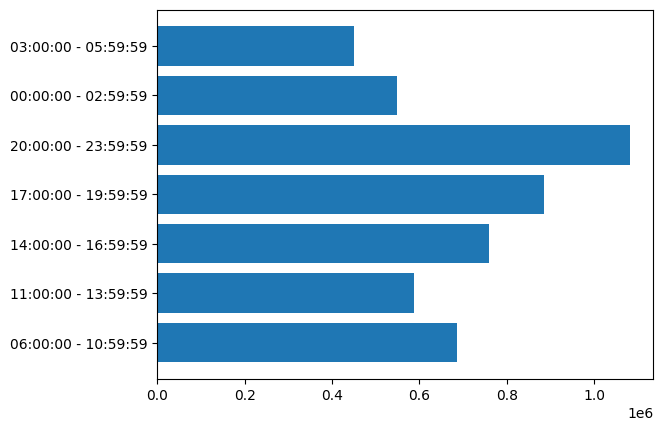

In [42]:
intervals = [("06:00:00", "10:59:59"), ("11:00:00", "13:59:59"), ("14:00:00", "16:59:59"), ("17:00:00", "19:59:59"), ("20:00:00", "23:59:59"), ("00:00:00", "02:59:59"), ("03:00:00",  "05:59:59")]

plot_posts_intervals(intervals)